In [16]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt



In [3]:
# run this just in case
nltk.download('all')
nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/summerlong/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/summerlong/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/summerlong/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/summerlong/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/summerlong/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    |

True

In [2]:
yelp_data = pd.read_csv("data/yelp_true_sample_100k.csv")

In [4]:
def preprocess_text(text):
    # tokenizing test, ensuring it is not case insensitive
    tokens = nltk.word_tokenize(text.lower())
    
    # removing stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # joining filtered tokens back into a string
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text

# apply function to 'text' column in yelp_data
yelp_data['text'] = yelp_data['text'].apply(preprocess_text)

In [5]:
yelp_data['sentiment'] = yelp_data['stars'].apply(lambda x: 0 if x <= 2 else 1)

In [6]:
# Splitting into train/test with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(yelp_data['text'], yelp_data['sentiment'], test_size=0.2, random_state=123)

# Define TF-IDF vectorizer and fit to the training data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform testing data using the same vectorizer to prevent data leakage
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [7]:
best_xgb_clf = XGBClassifier(max_depth=7, learning_rate=0.5, n_estimators=200)

best_xgb_clf.fit(X_train_tfidf, y_train)


In [12]:
importance = best_xgb_clf.feature_importances_
feature_names = tfidf_vectorizer.get_feature_names_out()

# Dictionary to store word-importance pairs
word_importance = {}

# Mapping feature importance scores to words
for word, importance_score in zip(feature_names, importance):
    word_importance[word] = importance_score
    
sorted_word_importance = sorted(word_importance.items(), key=lambda x: x[1], reverse=True)

for word, importance_score in sorted_word_importance:
    print(f"Word: {word}, Importance: {importance_score}")

Word: worst, Importance: 0.014791117049753666
Word: disgusting, Importance: 0.013847749680280685
Word: told, Importance: 0.01085196528583765
Word: horrible, Importance: 0.010591126047074795
Word: delicious, Importance: 0.010320160537958145
Word: terrible, Importance: 0.010240679606795311
Word: highly, Importance: 0.009813636541366577
Word: money, Importance: 0.009536469355225563
Word: amazing, Importance: 0.00948844663798809
Word: rude, Importance: 0.008662627078592777
Word: perfect, Importance: 0.008427024818956852
Word: favorite, Importance: 0.008264383301138878
Word: wonderful, Importance: 0.0067468248307704926
Word: poor, Importance: 0.006668998394161463
Word: definitely, Importance: 0.0065536946058273315
Word: asked, Importance: 0.006132443901151419
Word: fun, Importance: 0.005670355632901192
Word: awesome, Importance: 0.005635054782032967
Word: love, Importance: 0.005149337463080883
Word: fantastic, Importance: 0.0051001738756895065
Word: slow, Importance: 0.005017141345888376
Wo

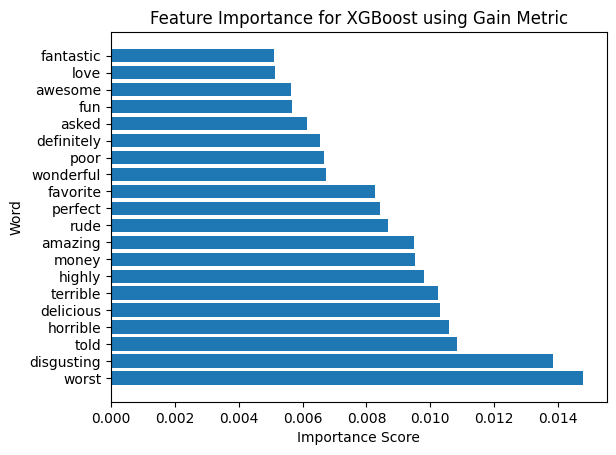

In [19]:
# Extract the words and importance scores from the list of tuples
words, importance_scores = zip(*sorted_word_importance[:20])

fig, ax = plt.subplots()

ax.barh(words, importance_scores)

ax.set_xlabel("Importance Score")
ax.set_ylabel("Word")
ax.set_title("Feature Importance for XGBoost using Gain Metric")

plt.show()